In the second copy, we decrease the number of observations generated in the data-generating notebook. We run the model fitting notebook on this new data. At the end of the notebook, we discuss how this resulting model fits and how these compare to the original.

# Predictive Modeling Example

## Step 1: Import a number of libraries that we expect to use

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


np.random.seed(1) # set this to ensure the results are repeatable. 

## Step 2:  Define a hidden linear relationship/model

First let's define our relationship (normally, this is hidden, but since we are creating the data, we will need to identify this)

In [2]:
b1 = 30.5 # slope for x
b0 = 20   # y intercept

## Step 3: Create input and output data using the model

Let's set the number of observations that we will synthesize...

In [3]:
sample_size = 600 #reduced sample size

We need to create a set of X (input) values. We could simply create a linear sequence...

In [4]:
x_mean = 0
x_stdev = 10
X = np.round(np.random.normal(x_mean, x_stdev, sample_size),2)

Once we have the X values (input), we can generate y values using our 'hidden' model...

In [5]:
y = b0 + b1 * np.sin(X)

But, this is rather boring data to analyze, because the 'hidden' model is not really hidden at all...

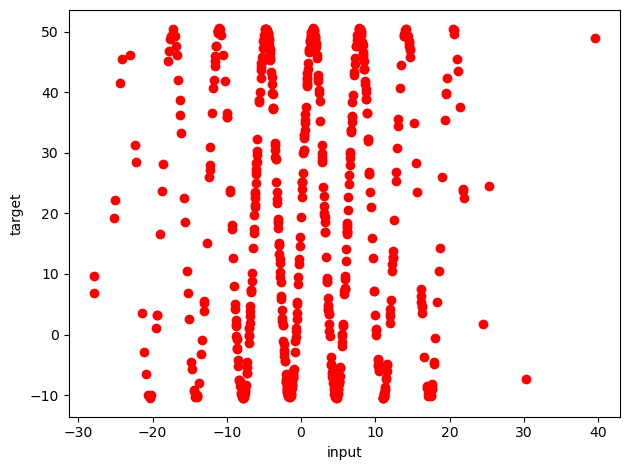

In [7]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

## Step 4: Add some random noise to 'hide' the model

Now, let's obscure the model by adding noise to the data by adding errors that are randomly selected from a norma distribution

In [10]:
e_mean = 0
e_stdev = 5
e = np.round(np.random.normal(e_mean, e_stdev, sample_size), 2) # round to two decimal places
y = y + e

## Step 5: Explore the resulting synthesized data

Now, let's look at a scatter plot of both the X and y data with the noise added in...

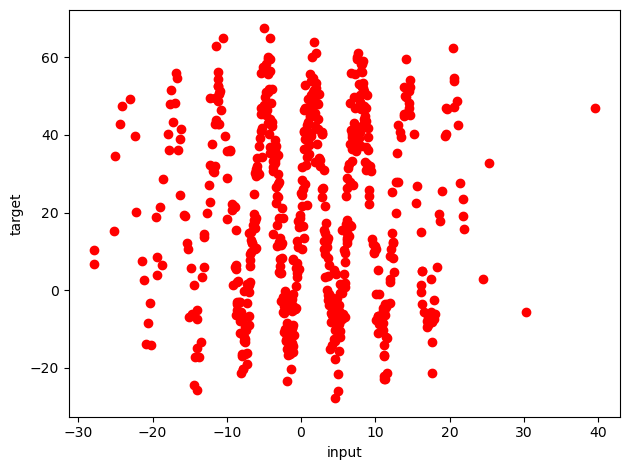

In [11]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

### Step 6: Create a pandas data frame from the data

Since our goal is to generate data that we can analyze with another notebook (for practice), let's save this data to a csv. 

First we will create a dataframe with the data we just similated...

In [12]:
df = pd.DataFrame({'input': X, 'target': y})
df.head(3)

,input,target
0,16.24,-3.532333
1,-6.12,30.655091
2,-5.28,41.877226


## Step 7: Save the data frame contents to a csv

Lastly, let's save the data we created to a csv file. This saved data will be used to practice finding hidden relationships in data.

In [20]:
#df.to_csv('./data/c02_dataset_3.csv', index=False)
#df = pd.read_csv('./data/c02_dataset_3.csv')

In [13]:
X=df[['input']]
y=df[['target']]

In [14]:
lin_reg = LinearRegression().fit(np.sin(X),y) # fit the model

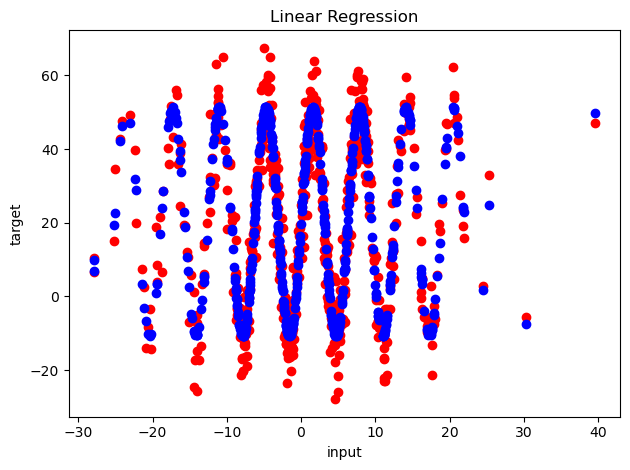

In [16]:
fig = plt.figure() # create a figure
ax = fig.add_subplot() # add a subplot

ax.scatter(X, y, color='red') # plot the actual values
ax.scatter(X,lin_reg.predict(np.sin(X)),color='blue') # plot the predicted values

ax.set_title('Linear Regression') 
ax.set_xlabel('input') 
ax.set_ylabel('target')
plt.tight_layout() # make sure the labels are not cut off
plt.show() # show the plot

In [17]:
b0 = lin_reg.intercept_[0] # get the intercept
b1 = lin_reg.coef_[0][0] # get the slope
r2 = lin_reg.score(np.sin(X), y) # get the R^2
print(f"Y = {b0:.2f} + {b1:.2f}sin(x)")
print(f"R^2: {r2:.3f}") 

Y = 20.31 + 31.12sin(x)
R^2: 0.903


Reducing size of observations to 600 (ealier 1000) in step 3 has a small effect on coefficients but the coefficient of determination is reduced from 0.948 to 0.903 which is still better than adding noise because adding noise reduces it much further.